In [1]:
# 1. Import thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# import Keras Network lib
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, GRU

# import RMSE,MSE,MAPE lib
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import explained_variance_score

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('../BTC-USD.csv')
df1=df.reset_index()['Close']
df1

0         457.334015
1         424.440002
2         394.795990
3         408.903992
4         398.821014
            ...     
3188    25851.240230
3189    25940.167970
3190    25902.500000
3191    25918.728520
3192    25124.675780
Name: Close, Length: 3193, dtype: float64

In [3]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [4]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [5]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [6]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [7]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [8]:
# 8. Define GRU Model

model = Sequential()
model.add(GRU(64, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [9]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 39s 428ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 2/100
29/29 [==============================] - 5s 187ms/step - loss: 7.4853e-05 - val_loss: 0.0015
Epoch 3/100
29/29 [==============================] - 5s 177ms/step - loss: 4.9597e-05 - val_loss: 9.4141e-04
Epoch 4/100
29/29 [==============================] - 5s 184ms/step - loss: 4.6863e-05 - val_loss: 0.0010
Epoch 5/100
29/29 [==============================] - 5s 189ms/step - loss: 4.2395e-05 - val_loss: 8.7038e-04
Epoch 6/100
29/29 [==============================] - 6s 196ms/step - loss: 4.0862e-05 - val_loss: 0.0010
Epoch 7/100
29/29 [==============================] - 6s 194ms/step - loss: 4.0926e-05 - val_loss: 9.6173e-04
Epoch 8/100
29/29 [==============================] - 6s 195ms/step - loss: 3.9934e-05 - val_loss: 9.1775e-04
Epoch 9/100
29/29 [==============================] - 5s 184ms/step - loss: 3.8113e-05 - val_loss: 8.6551e-04
Epoch 10/100
29/29 [==================

Epoch 76/100
29/29 [==============================] - 3s 96ms/step - loss: 2.0924e-05 - val_loss: 4.9641e-04
Epoch 77/100
29/29 [==============================] - 3s 97ms/step - loss: 2.5068e-05 - val_loss: 4.2351e-04
Epoch 78/100
29/29 [==============================] - 3s 89ms/step - loss: 2.0696e-05 - val_loss: 7.7383e-04
Epoch 79/100
29/29 [==============================] - 3s 94ms/step - loss: 2.3588e-05 - val_loss: 9.7663e-04
Epoch 80/100
29/29 [==============================] - 3s 97ms/step - loss: 2.2057e-05 - val_loss: 7.3044e-04
Epoch 81/100
29/29 [==============================] - 3s 93ms/step - loss: 2.1517e-05 - val_loss: 5.9627e-04
Epoch 82/100
29/29 [==============================] - 3s 97ms/step - loss: 2.0627e-05 - val_loss: 7.3892e-04
Epoch 83/100
29/29 [==============================] - 3s 96ms/step - loss: 2.0692e-05 - val_loss: 5.0837e-04
Epoch 84/100
29/29 [==============================] - 3s 91ms/step - loss: 2.1730e-05 - val_loss: 4.2931e-04
Epoch 85/100
29/29 

In [10]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

17/17 [==============================] - 0s 14ms/step


In [11]:
rmse = mean_squared_error(ytest, y_pred, squared=False)
print("RMSE on test set: {:.3f}".format(rmse))
rmse = mean_squared_error(yval, y_pred_val, squared=False)
print("RMSE on validation set: {:.3f}".format(rmse))
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE on test set: {:.3f}".format(mape))
mape = mean_absolute_percentage_error(yval, y_pred_val)
print("MAPE on validation set: {:.3f}".format(mape))
evs = explained_variance_score(ytest, y_pred)
print("The explained variance score (EVS) on test set: {:.3f}".format(evs))
evs = explained_variance_score(yval, y_pred_val)
print("The explained variance score (EVS) on validate set: {:.3f}".format(evs))

RMSE on test set: 0.022
RMSE on validation set: 0.014
MAPE on test set: 0.028
MAPE on validation set: 0.022
The explained variance score (EVS) on test set: 0.994
The explained variance score (EVS) on validate set: 0.990


In [12]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [13]:

# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input.shape

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

from numpy import array

lst_output = []
n_steps = 100
i = 0
while i < 30 and len(temp_input) >= n_steps:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[-n_steps:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = np.array(temp_input[-n_steps:])
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.32708241 0.3196377  0.29952961 0.2969212  0.30352714 0.32625408
 0.35643099 0.36457095 0.35907873 0.36912237 0.40430839 0.39751124
 0.41343077 0.40940281 0.41546584 0.40257973 0.41781277 0.40533757
 0.40535867 0.41277272 0.40009342 0.40199644 0.41802747 0.4133549
 0.41995722 0.41895632 0.41581445 0.40974388 0.41535119 0.41549801
 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589 0.44602351
 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506 0.43430028
 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869 0.4067933
 0.40581324 0.41742138 0.41912943 0.43472679 0.43274537 0.43138352
 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627 0.43562601
 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398 0.39802928
 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144 0.40393552
 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064 0.40136719
 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779 0.40908597
 0.40843994 0.40127714 0.3953461  0.40172131 0.39913

 0.37103721 0.37131563 0.3715843  0.37185019]
7 day output [[0.372115]]
8 day input [0.35907873 0.36912237 0.40430839 0.39751124 0.41343077 0.40940281
 0.41546584 0.40257973 0.41781277 0.40533757 0.40535867 0.41277272
 0.40009342 0.40199644 0.41802747 0.4133549  0.41995722 0.41895632
 0.41581445 0.40974388 0.41535119 0.41549801 0.41351187 0.41175666
 0.41208217 0.41779909 0.43738589 0.44602351 0.44459885 0.44845727
 0.44974283 0.44726166 0.44721506 0.43430028 0.4484348  0.42506483
 0.41650714 0.40212672 0.41014869 0.4067933  0.40581324 0.41742138
 0.41912943 0.43472679 0.43274537 0.43138352 0.43168503 0.41421566
 0.42295553 0.42778975 0.42543627 0.43562601 0.42628081 0.41960841
 0.40832009 0.40779333 0.40724398 0.39802928 0.39512377 0.39481345
 0.3969883  0.40087701 0.39856144 0.40393552 0.39552768 0.39638717
 0.39994054 0.39436453 0.39581064 0.40136719 0.38814676 0.39024487
 0.39385206 0.39606404 0.41412779 0.40908597 0.40843994 0.40127714
 0.3953461  0.40172131 0.39913243 0.39978444 

16 day output [[0.3743655]]
17 day input [0.40533757 0.40535867 0.41277272 0.40009342 0.40199644 0.41802747
 0.4133549  0.41995722 0.41895632 0.41581445 0.40974388 0.41535119
 0.41549801 0.41351187 0.41175666 0.41208217 0.41779909 0.43738589
 0.44602351 0.44459885 0.44845727 0.44974283 0.44726166 0.44721506
 0.43430028 0.4484348  0.42506483 0.41650714 0.40212672 0.41014869
 0.4067933  0.40581324 0.41742138 0.41912943 0.43472679 0.43274537
 0.43138352 0.43168503 0.41421566 0.42295553 0.42778975 0.42543627
 0.43562601 0.42628081 0.41960841 0.40832009 0.40779333 0.40724398
 0.39802928 0.39512377 0.39481345 0.3969883  0.40087701 0.39856144
 0.40393552 0.39552768 0.39638717 0.39994054 0.39436453 0.39581064
 0.40136719 0.38814676 0.39024487 0.39385206 0.39606404 0.41412779
 0.40908597 0.40843994 0.40127714 0.3953461  0.40172131 0.39913243
 0.39978444 0.37961832 0.40156095 0.38831266 0.39071987 0.39030672
 0.38097081 0.38229043 0.38173147 0.38197229 0.37018912 0.37056175
 0.37046546 0.3707407

25 day output [[0.37629083]]
26 day input [0.41581445 0.40974388 0.41535119 0.41549801 0.41351187 0.41175666
 0.41208217 0.41779909 0.43738589 0.44602351 0.44459885 0.44845727
 0.44974283 0.44726166 0.44721506 0.43430028 0.4484348  0.42506483
 0.41650714 0.40212672 0.41014869 0.4067933  0.40581324 0.41742138
 0.41912943 0.43472679 0.43274537 0.43138352 0.43168503 0.41421566
 0.42295553 0.42778975 0.42543627 0.43562601 0.42628081 0.41960841
 0.40832009 0.40779333 0.40724398 0.39802928 0.39512377 0.39481345
 0.3969883  0.40087701 0.39856144 0.40393552 0.39552768 0.39638717
 0.39994054 0.39436453 0.39581064 0.40136719 0.38814676 0.39024487
 0.39385206 0.39606404 0.41412779 0.40908597 0.40843994 0.40127714
 0.3953461  0.40172131 0.39913243 0.39978444 0.37961832 0.40156095
 0.38831266 0.39071987 0.39030672 0.38097081 0.38229043 0.38173147
 0.38197229 0.37018912 0.37056175 0.37046546 0.37074071 0.37103721
 0.37131563 0.3715843  0.37185019 0.37211499 0.37237835 0.37263945
 0.37289765 0.373152

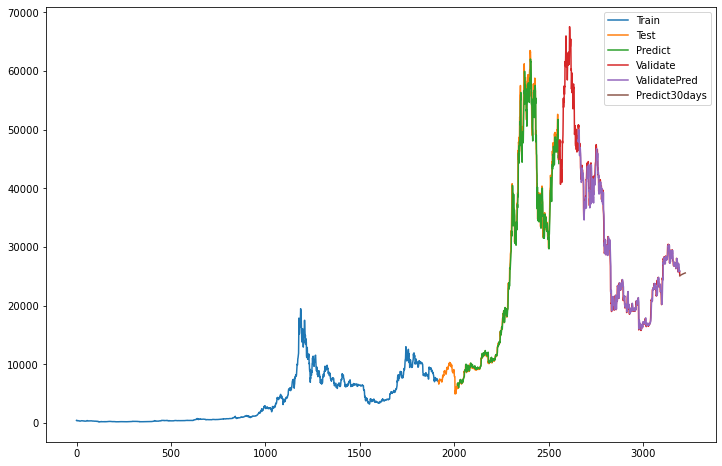

In [14]:
# 14.Vẽ hình

plt.subplots(figsize=(12, 8))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])
plt.show()